In [12]:
import sys
sys.path.append('../src')

from eda_fn import *

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print("done")


done


In [14]:
# import data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission_df = pd.read_csv('../data/sample_submission.csv')

In [15]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### Exploring Numerical Features

In [30]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [31]:
# Statistical summary of numerical features
train_df[numerical_features].describe().round(3)

,CreditScore,Age,Balance,EstimatedSalary
count,165034.000,165034.000,165034.000,165034.000
mean,656.454,38.126,55478.087,112574.823
std,80.103,8.867,62817.663,50292.866
min,350.000,18.000,0.000,11.580
25%,597.000,32.000,0.000,74637.570
50%,659.000,37.000,0.000,117948.000
75%,710.000,42.000,119939.518,155152.468
max,850.000,92.000,250898.090,199992.480


In [19]:
len(numerical_features)

9

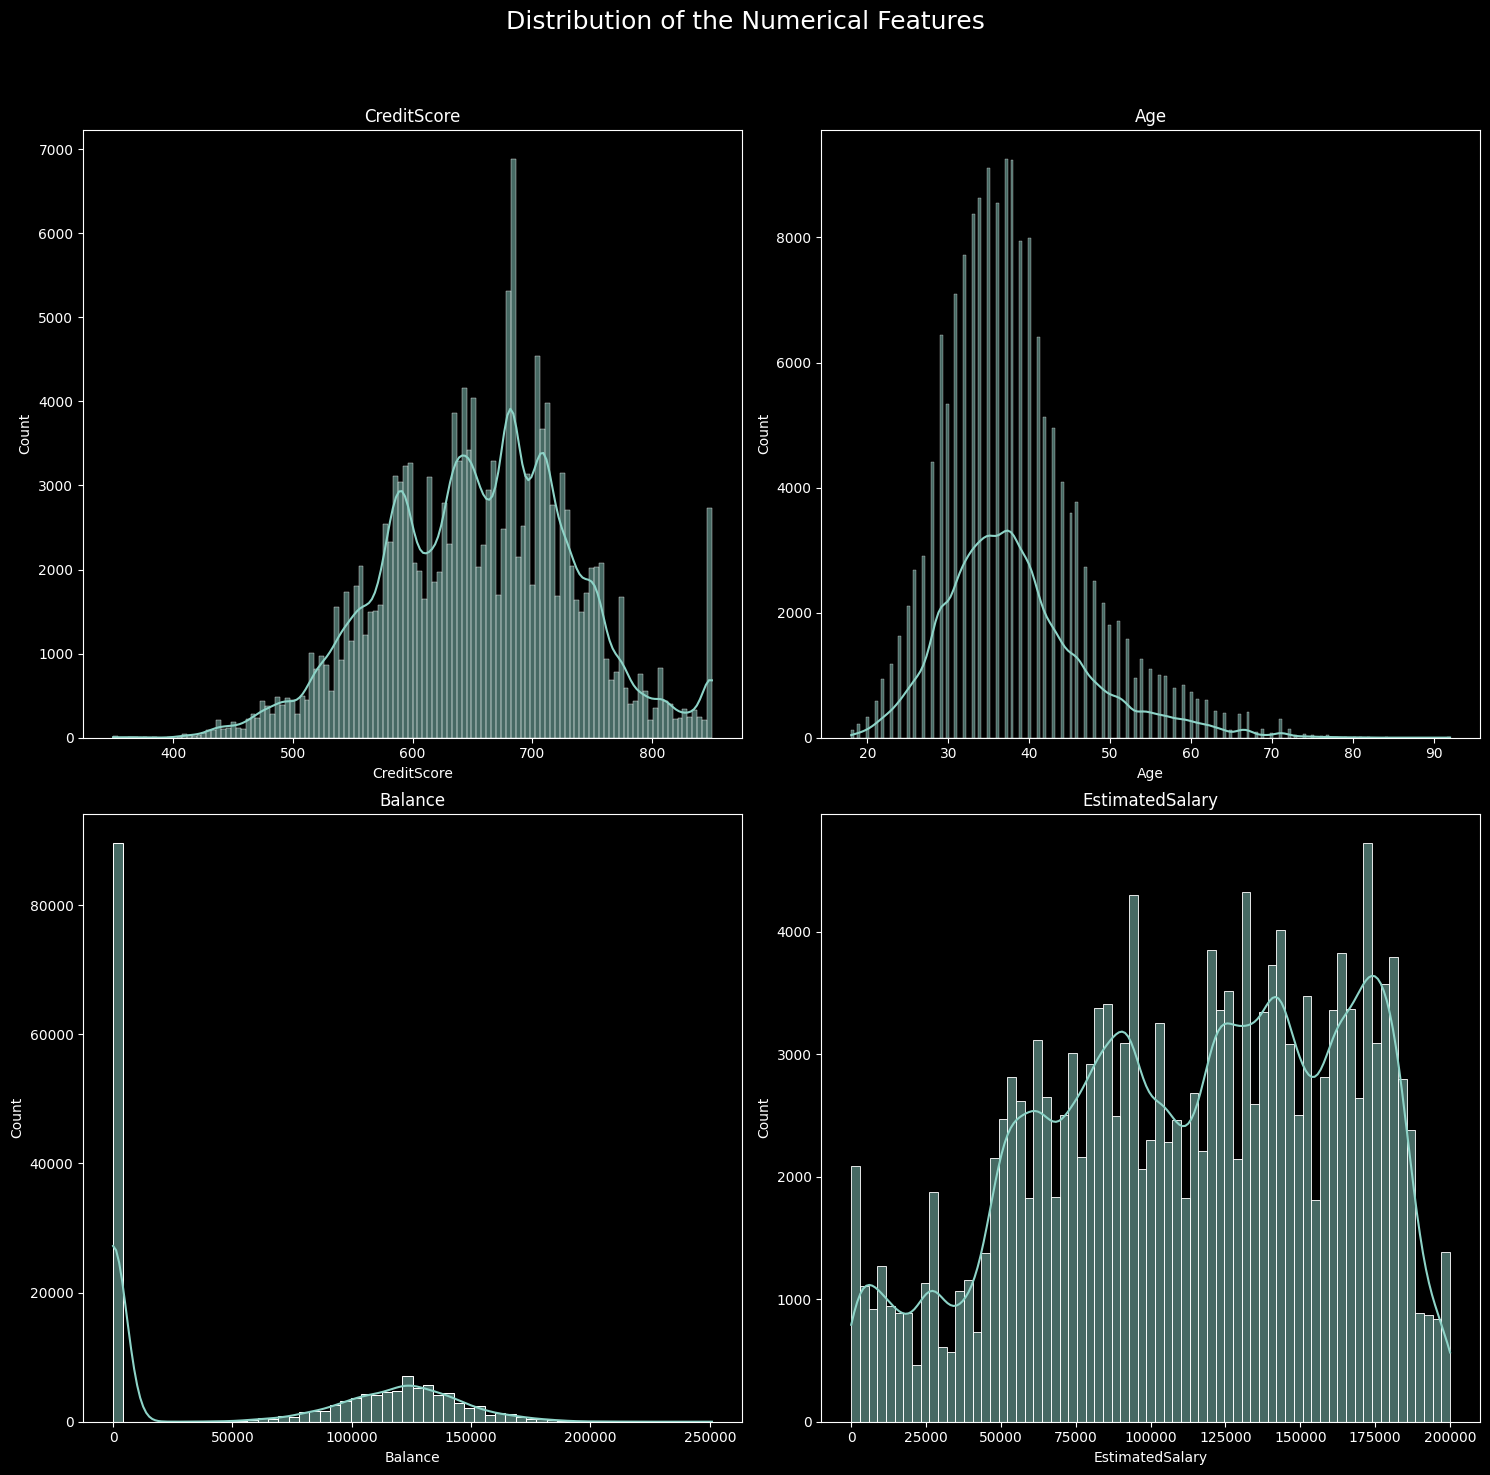

In [32]:
plot_feature_distribution(train_df, numerical_features, 2, 2, title='Distribution of the Numerical Features', figsize=(15, 15))

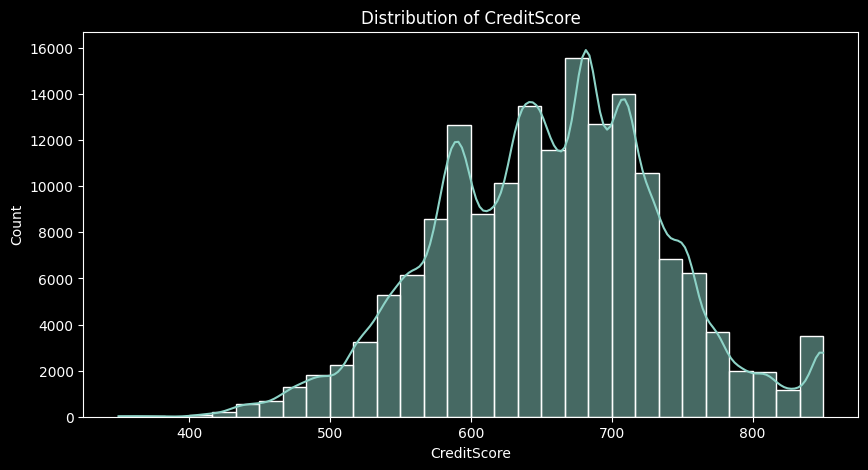

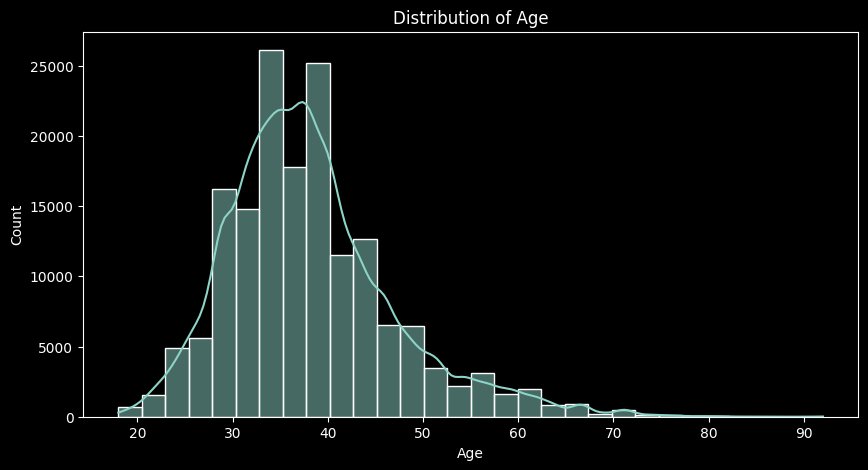

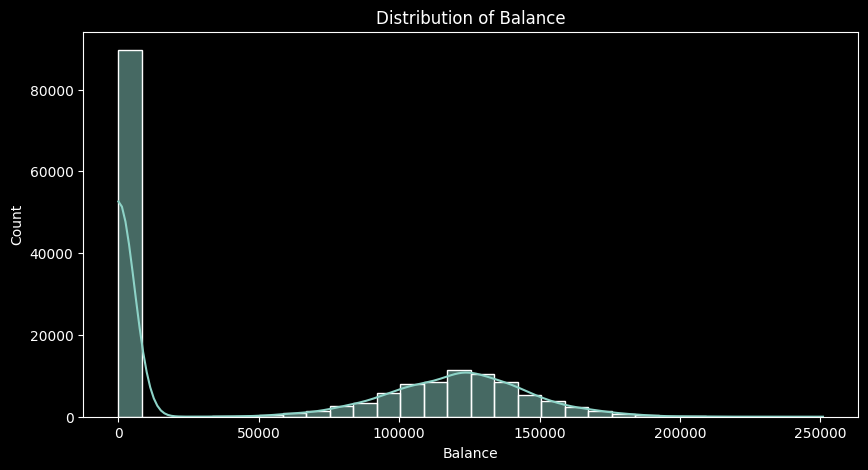

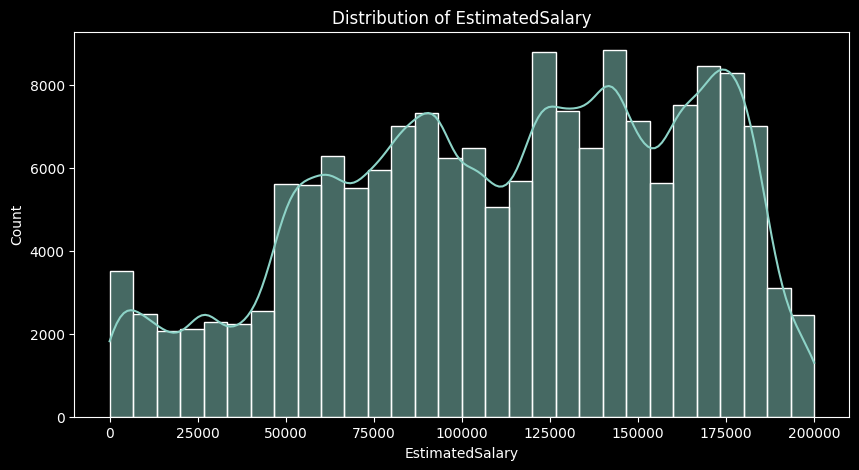

In [41]:
# Plot the distribution of each feature:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Exploring Categorical Features

In [24]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [39]:
# Categorical features
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

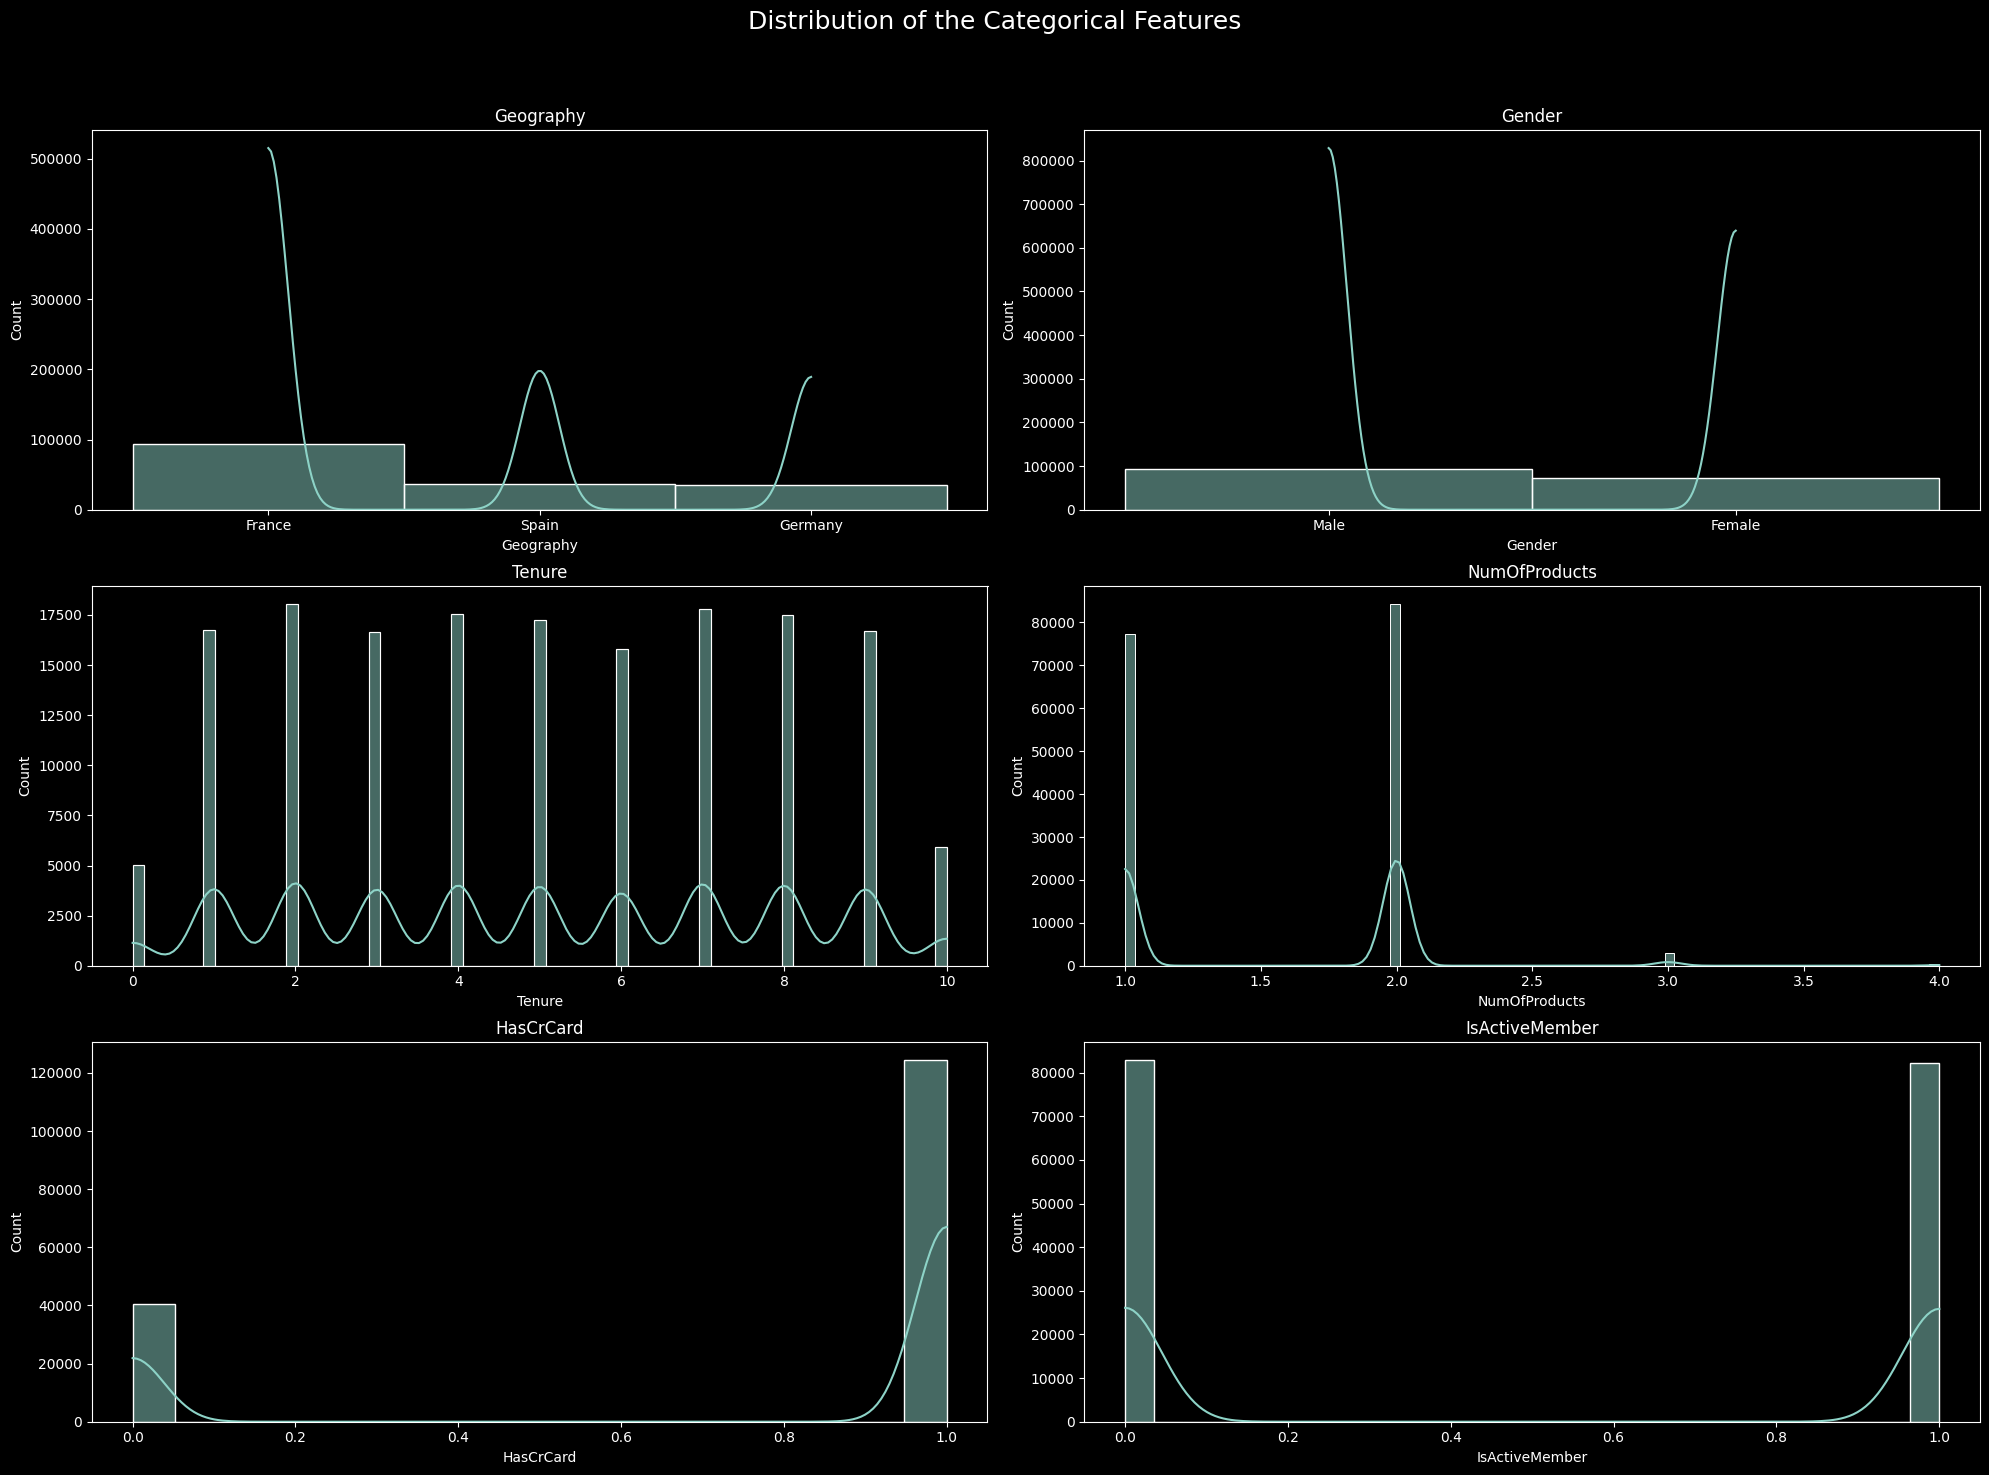

In [40]:
# Plot the distribution of categorical features
plot_feature_distribution(train_df, categorical_features, 3, 2, title='Distribution of the Categorical Features', figsize=(20, 15))

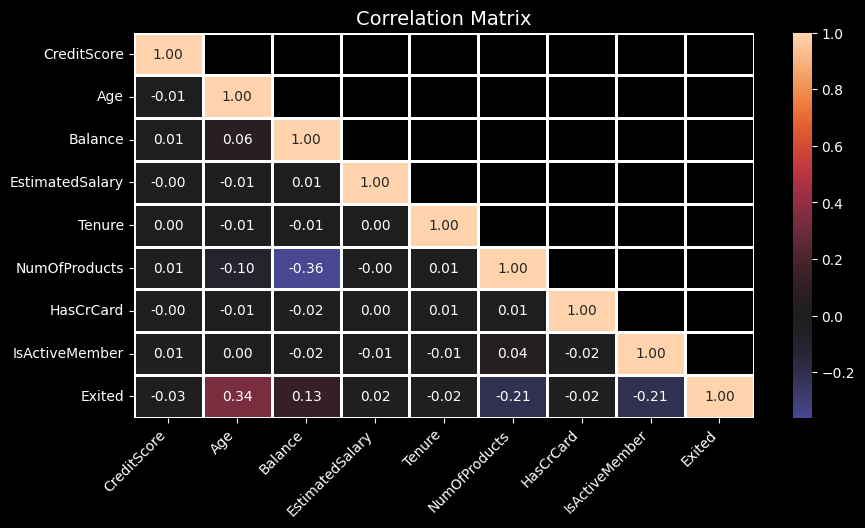

In [47]:
# Correlation Analysis
feature_corr = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
plot_feature_correlation_heatmap(train_df[feature_corr], title='Correlation between Numerical Features', figsize=(10, 5))


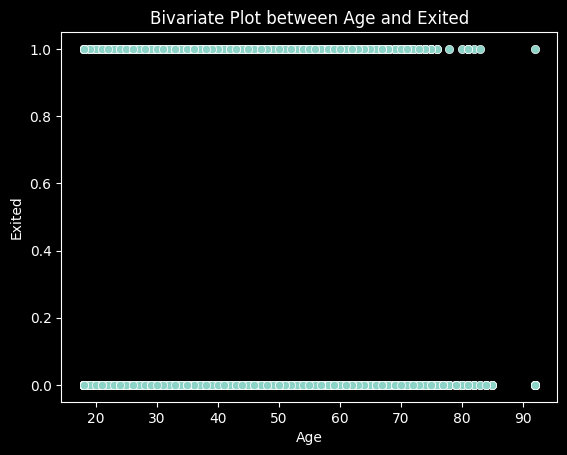

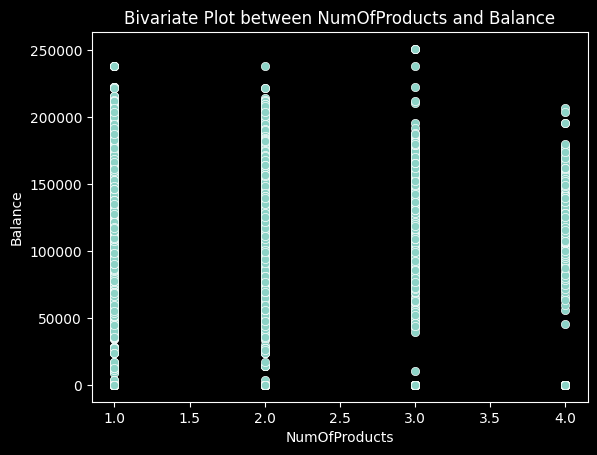

In [53]:
# Bi-variate Analysis:
## between Age and Exited
sns.scatterplot(x='Age', y='Exited', data=train_df)
plt.xlabel('Age')
plt.ylabel('Exited')
plt.title('Bivariate Plot between Age and Exited')
plt.show()

## NumOfProducts and Balance
sns.scatterplot(x='NumOfProducts', y='Balance', data=train_df)
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')
plt.title('Bivariate Plot between NumOfProducts and Balance')
plt.show()